In [1]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select

import pandas as pd
import pickle
import os
import sys
import warnings
import time

import geopandas
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
plt.style.use('ggplot')

from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


from selenium.webdriver.edge.options import Options

edge_options = Options()
#edge_options.add_argument('--headless')
edge_options.add_argument("--disable-images")  # Disable images
edge_options.add_argument("--disable-javascript")  # Disable JavaScript
edge_options.add_argument("--disable-plugins")  # Disable plugins
edge_options.add_argument("--disable-extensions")  # Disable extensions
edge_options.add_argument("--blink-settings=imagesEnabled=false")  # Another image disabling flag


# Set a minimal User-Agent (like a text-only browser)
edge_options.add_argument("user-agent=Links (2.25; Linux 2.4.24)")

#driver = webdriver.Edge(options=edge_options)
#driver.execute_cdp_cmd("Network.setBlockedURLs", {"urls": ["*.jpg", "*.png", "*.gif","*.svg"]})
#driver.execute_cdp_cmd("Network.enable", {})


#driver.maximize_window()

#driver.execute_script("document.body.style.zoom='67%'")



import warnings
warnings.filterwarnings('ignore')

In [ ]:
main_url="https://pantheon.world/explore/rankings?show=people&years=-3501,2023"
driver.get(main_url)

In [ ]:
iso3=[e.get_attribute('value') for e in driver.find_elements(By.CSS_SELECTOR,'div[class="x"] select option')]
iso3=[i for i in iso3 if i!='all']

In [ ]:
country_urls=[f'{main_url}&place={i}' for i in iso3]

In [ ]:
all_rows=[]

for index, country_url in enumerate(country_urls,start=1):
    if index<=country_urls.index('https://pantheon.world/explore/rankings?show=people&years=-3501,2023&place=ltu'):
        continue
    
    driver.get(country_url)
    all_buttons=[e for e in WebDriverWait(driver, 10).until(expected_conditions.visibility_of_all_elements_located((By.CSS_SELECTOR, 'div[class="x"] button')))]

    page=0
    while True:
        try:
            html=driver.page_source
            soup=BeautifulSoup(html)

            rows=[tr.get_text(separator='|') for tr in soup.select('table[role="table"] tbody[role="rowgroup"] tr')]
            all_rows.extend(rows)
        except:
            continue

        next_button=[e for e in WebDriverWait(driver, 10).until(expected_conditions.visibility_of_all_elements_located((By.CSS_SELECTOR, 'div[class="x"] button'))) if e.text=='>'][0]
        all_buttons=[e for e in WebDriverWait(driver, 10).until(expected_conditions.visibility_of_all_elements_located((By.CSS_SELECTOR, 'div[class="x"] button')))]
        next_button_index=all_buttons.index(next_button)

        if all_buttons[next_button_index].get_attribute('disabled')=='true':
            print(f'{index}/{len(country_urls)}, {country_url} Page {page}, Rows: {len(all_rows)}',end='\r')    
            break
        else:
            next_button.click()
            page+=1
            time.sleep(2)

            print(f'{index}/{len(country_urls)}, {country_url} Page {page}, Rows: {len(all_rows)}',end='\r')    

In [ ]:
all_rows=pickle.load(open('all_rows.pickle','rb'))

In [ ]:
all_rows=[i for i in all_rows if 'Showing 50 of' not in i]

In [ ]:
values=[]
for row in all_rows:
    value=row.split('|')
    values.append(value)

In [ ]:
df=pd.DataFrame(values)
df=df.drop(columns=[0,15,16,17,18])

In [ ]:
df.columns=['Name','Occupation','Birth Year', 'Death Year', 'Gender','Birth City', 'Birth Country', 'Death City', 'Death Country', 
            'WLE','EWLE','PVne','CV','HPI2024']

In [ ]:
df=df.dropna(how='all')
df=df.drop_duplicates()

In [2]:
#df.to_csv('memorable people.csv',index=False)

### EDA

In [3]:
df=pd.read_csv("memorable people.csv")

In [4]:
df

,Name,Occupation,Birth Year,Death Year,Gender,Birth City,Birth Country,Death City,Death Country,WLE,EWLE,PVne,CV,HPI2024
0,Rumi,WRITER,1207,1273,Male,Balkh,Afghanistan,Konya,Türkiye,103,10.07,1.2M,4.21,86.05
1,Al-Farabi,PHILOSOPHER,872,951,Male,Faryab Province,Afghanistan,Damascus,Syria,79,10.75,640k,2.94,84.11
2,Abbas the Great,POLITICIAN,1571,1629,Male,Herat,Afghanistan,Behshahr,Iran,76,8.24,290k,3.88,79.32
3,Roxana,COMPANION,347 BC,310 BC,Female,Bactria,Afghanistan,Amphipolis,Greece,54,8.37,280k,3.67,77.77
4,Hamid Karzai,POLITICIAN,1957,-,Male,"Karz, Kandahar",Afghanistan,-,-,88,20.80,170k,2.45,76.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116484,Peter Wetzlar,SWIMMER,1997,-,Male,Harare,Zimbabwe,-,-,5,1.36,29,1.59,7.84
116485,Taryn Mallett,ATHLETE,1992,-,Female,Harare,Zimbabwe,-,-,3,1.49,13,0.73,7.51
116486,Dominique du Toit,ATHLETE,1997,-,Female,Marondera,Zimbabwe,-,-,3,1.06,34,0.98,5.42
116487,Donata Katai,SWIMMER,2004,-,Female,Harare,Zimbabwe,-,-,4,1.07,16,0.98,1.98


In [5]:
df['Birth Year']=df['Birth Year'].apply(lambda x:
                       int(x) if isinstance(x,str) and 'AD' not in x and 'BC' not in x and x!='Unknown' and x!='-' else
                       -1*int(x.replace('BC','')) if x and 'BC' in x else
                       int(x.replace('AD','')) if x and 'AD' in x else
                       None if x=='Unknown' else
                       None if x=='-' else x
                       )

df['Death Year']=df['Death Year'].apply(lambda x:
                       int(x) if isinstance(x,str) and 'AD' not in x and 'BC' not in x and x!='Unknown' and x!='-' else
                       -1*int(x.replace('BC','')) if x and 'BC' in x else
                       int(x.replace('AD','')) if x and 'AD' in x else
                       None if x=='Unknown' else
                       None if x=='-' else x
                       )

df['Birth Year']=df['Birth Year'].apply(pd.to_numeric)
df['Death Year']=df['Death Year'].apply(pd.to_numeric)

In [6]:
df['Death Age']=df['Death Year']-df['Birth Year']

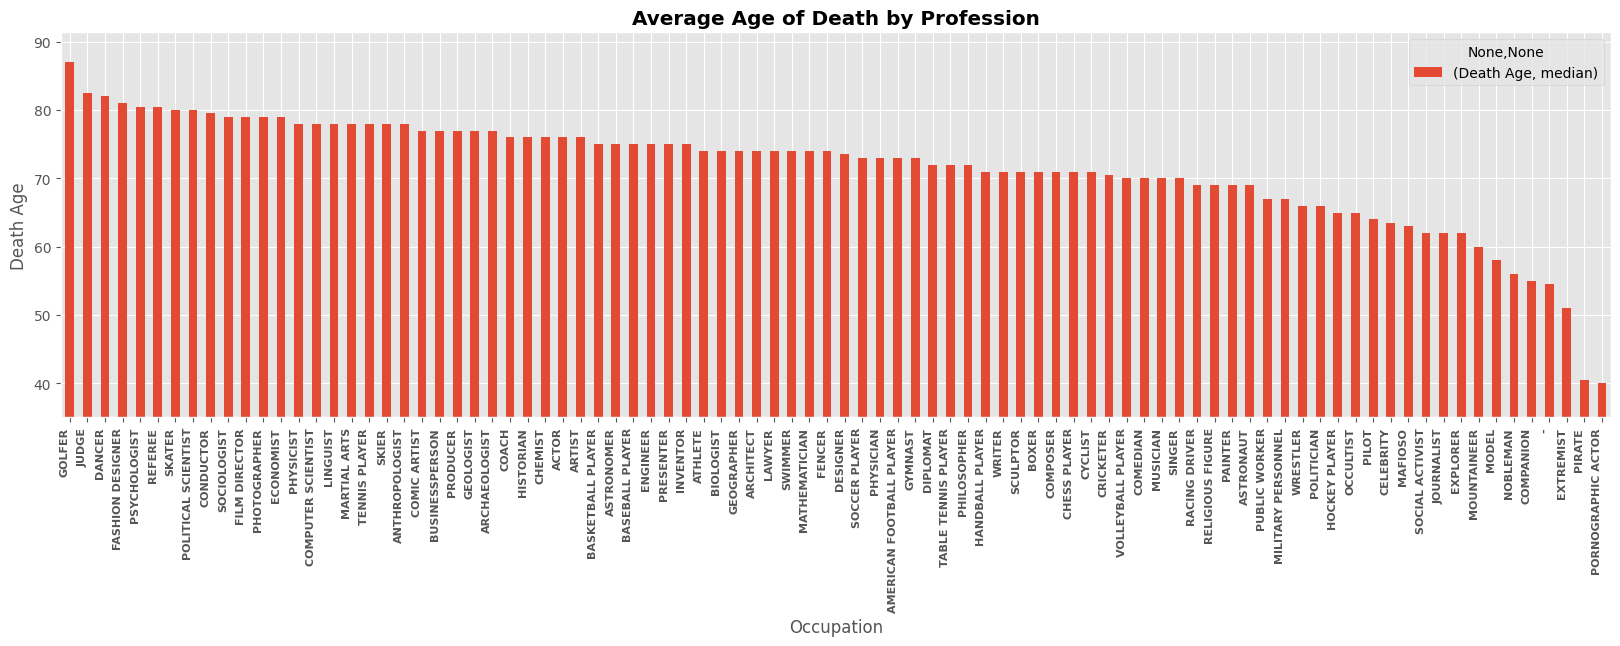

In [7]:
grouped=df.groupby('Occupation').agg({'Death Age': ['count', 'median']}).reset_index().sort_values(('Death Age', 'median'), ascending=False).sort_values(('Death Age','median'),ascending=False)
grouped=grouped[grouped[('Death Age','count')]>=10]

fig,ax=plt.subplots(figsize=(20,5))
grouped.plot.bar(ax=ax,x='Occupation',y=('Death Age','median'))
ax.set_xticklabels(grouped['Occupation'], rotation=90, ha='right',size=8,fontweight='bold')
plt.ylim(35)
plt.title('Average Age of Death by Profession',fontweight='bold')
plt.ylabel('Death Age')
plt.show()



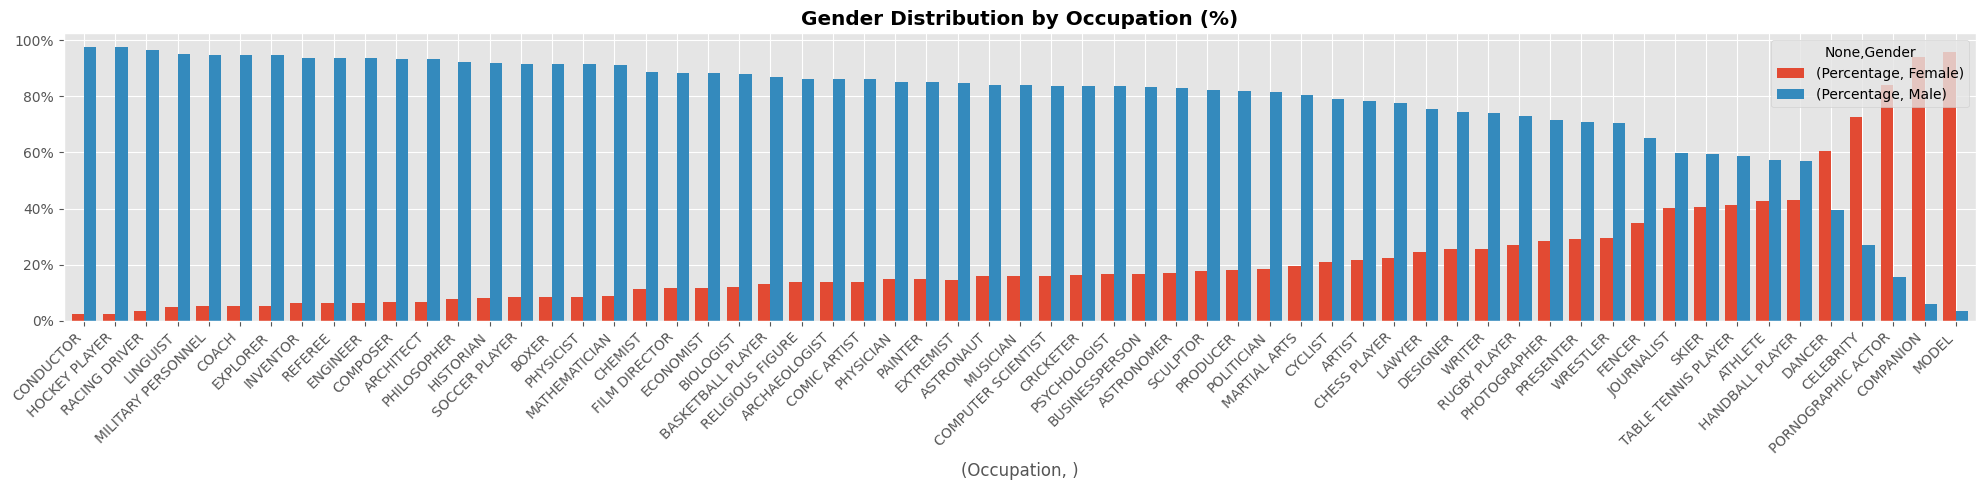

In [8]:
grouped=df.query('Gender!="-" and Occupation!="-"').groupby(['Gender','Occupation'])['Name'].count().reset_index().sort_values(['Occupation','Gender'])
grouped['Percentage']=grouped.groupby('Occupation')['Name'].transform(lambda x:x/x.sum())

pivot = grouped.pivot(index='Occupation', columns='Gender', values=['Name','Percentage']).reset_index()


filtered = pivot[
    ((pivot['Name']['Female'] + pivot['Name']['Male']) >= 100) &
    ((pivot['Percentage']['Female'] - pivot['Percentage']['Male']).abs() >= 0.1)
]

filtered=filtered[[('Occupation', ''), ('Percentage', 'Female'), ('Percentage', 'Male')]].sort_values(('Percentage', 'Male'),ascending=False)

ax = filtered.plot.bar(x=('Occupation', ''), figsize=(20,5), width=0.8)
ax.set_xticklabels(filtered[('Occupation', '')], rotation=45, ha='right')
ax.set_title('Gender Distribution by Occupation (%)',fontweight='bold')

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.tight_layout()


In [9]:
grouped=df.groupby(['Birth Country','Occupation'])['Name'].count().reset_index()
grouped['Percentage']=grouped.groupby('Birth Country')['Name'].transform(lambda x:x/x.sum())
grouped=grouped.sort_values(['Birth Country','Percentage'],ascending=[True,False])
grouped=grouped.groupby('Birth Country').head(1).reset_index(drop=True)

print("Most popular occupations of notable people by country and corresponding percentages:")
print({(i['Birth Country'], i['Occupation']): i['Percentage'] for _, i in grouped.iterrows()})

print("\nOccupations that are most popular among famous people worldwide and their frequencies:")
print(grouped['Occupation'].value_counts())


Most popular occupations of notable people by country and corresponding percentages:
{('Afghanistan', 'POLITICIAN'): 0.5965909090909091, ('Albania', 'POLITICIAN'): 0.33986928104575165, ('Algeria', 'SOCCER PLAYER'): 0.24267782426778242, ('Argentina', 'SOCCER PLAYER'): 0.5188383045525903, ('Armenia', 'ATHLETE'): 0.16022099447513813, ('Australia', 'ATHLETE'): 0.2303370786516854, ('Austria', 'POLITICIAN'): 0.16393442622950818, ('Azerbaijan', 'POLITICIAN'): 0.16, ('Bangladesh', 'POLITICIAN'): 0.34210526315789475, ('Barbados', 'ATHLETE'): 0.36, ('Belarus', 'ATHLETE'): 0.24489795918367346, ('Belgium', 'SOCCER PLAYER'): 0.2108479755538579, ('Benin', 'POLITICIAN'): 0.5666666666666667, ('Bolivia', 'POLITICIAN'): 0.5233644859813084, ('Bosnia and Herzegovina', 'SOCCER PLAYER'): 0.32987012987012987, ('Botswana', 'ATHLETE'): 0.5625, ('Brazil', 'SOCCER PLAYER'): 0.6591375770020534, ('Bulgaria', 'POLITICIAN'): 0.26292134831460673, ('Burkina Faso', 'SOCCER PLAYER'): 0.41509433962264153, ('Cambodia', 'P

In [10]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None
    
    
countries=list(df['Birth Country'].unique())

iso3_codes={}

for i, country in enumerate(countries, start=1):
    iso3=get_iso3(country)
    iso3_codes[country]=iso3

    print(f'{i}/{len(countries)}',end='\r')

In [11]:
{k:v for k, v in iso3_codes.items() if v==None}

{'Democratic Republic of the Congo': None,
 'Myanmar (Burma)': None,
 'Palestine': None,
 'Russia': None,
 'The Bahamas': None,
 'The Gambia': None,
 'Vatican City': None}

In [12]:
iso3_codes['Democratic Republic of the Congo']='COD'
iso3_codes['Myanmar (Burma)']='MMR'
iso3_codes['Palestine']='PSE'
iso3_codes['Russia']='RUS'
iso3_codes['The Gambia']='GMB'

In [13]:
grouped['ISO3']=grouped['Birth Country'].map(iso3_codes)

In [14]:
world = geopandas.read_file("geopandas/world-administrative-boundaries (detailed)/world-administrative-boundaries.shp")
grouped=grouped.merge(world[['iso3','geometry']],right_on='iso3',left_on='ISO3')
grouped=geopandas.GeoDataFrame(grouped)

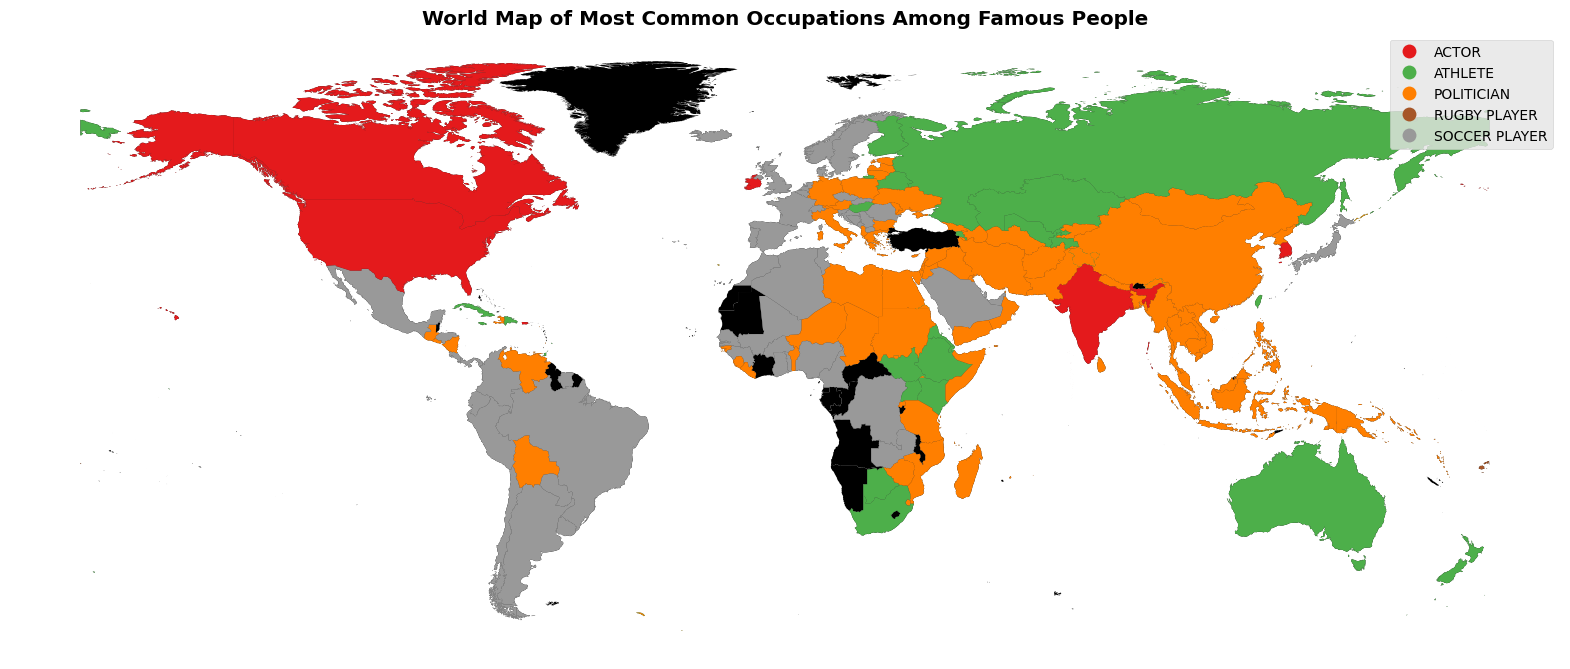

In [15]:
fig,ax =plt.subplots(figsize=(20,15))

world.plot(ax=ax, color='black',label='N/A')
grouped.plot(ax=ax, column='Occupation', legend=True,cmap='Set1')
ax.axis('off')
plt.title('World Map of Most Common Occupations Among Famous People', fontweight ='bold')
plt.show()